In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[105]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet, LassoLars, Ridge, LinearRegression, Lasso

In [2]:
# In[106]:
# Load data from path
df01 = pd.read_csv("csv_experiments_WEB1.csv")
df02 = pd.read_csv("csv_experiments_WEB2.csv")
df03 = pd.read_csv("csv_experiments_WEB3.csv")

# do renaming and selection
mapping01 = {
    "param__func__de.upb.lb-nginx.0.1__cpu_bw": "CPU",
    "param__func__de.upb.lb-nginx.0.1__mem_max": "MEM",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "throughput",
}

mapping02 = {
    "param__func__de.upb.lb-haproxy.0.1__cpu_bw": "CPU",
    "param__func__de.upb.lb-haproxy.0.1__mem_max": "MEM",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "throughput",
}

mapping03 = {
    "param__func__de.upb.px-squid.0.1__cpu_bw": "CPU",
    "param__func__de.upb.px-squid.0.1__mem_max": "MEM",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "throughput",
}




In [3]:
def select_and_rename(df, mapping):
    """
    Helper: Selects columns of df using the keys
    of the mapping dict.
    It renames the columns to the values of the
    mappings dict.
    """
    # select subset of columns
    dff = df[list(mapping.keys())]
    # rename 
    for k, v in mapping.items():
        dff.rename(columns={k: v}, inplace=True)
    return dff

In [4]:
df01 = select_and_rename(df01, mapping01)
df02 = select_and_rename(df02, mapping02)
df03 = select_and_rename(df03, mapping03)

#df_list = [df01, df02, df03]

df_list = [df01]


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


NFV Data Visualization
   CPU  MEM  throughput
0  0.1   64      517.21
1  0.1   64      521.33
2  0.1   64      510.55
3  0.1   64      512.59
4  0.1   64      494.36
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 3 columns):
CPU           1600 non-null float64
MEM           1600 non-null int64
throughput    1598 non-null float64
dtypes: float64(2), int64(1)
memory usage: 37.6 KB
None
Describe
               CPU          MEM    throughput
count  1600.000000  1600.000000  1.598000e+03
mean      0.550000   240.000000  4.227236e+05
std       0.287318   171.634529  5.355043e+05
min       0.100000    64.000000  4.936000e+02
25%       0.300000   112.000000  2.198950e+03
50%       0.550000   192.000000  5.631738e+04
75%       0.800000   320.000000  8.706703e+05
max       1.000000   512.000000  1.598779e+06


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


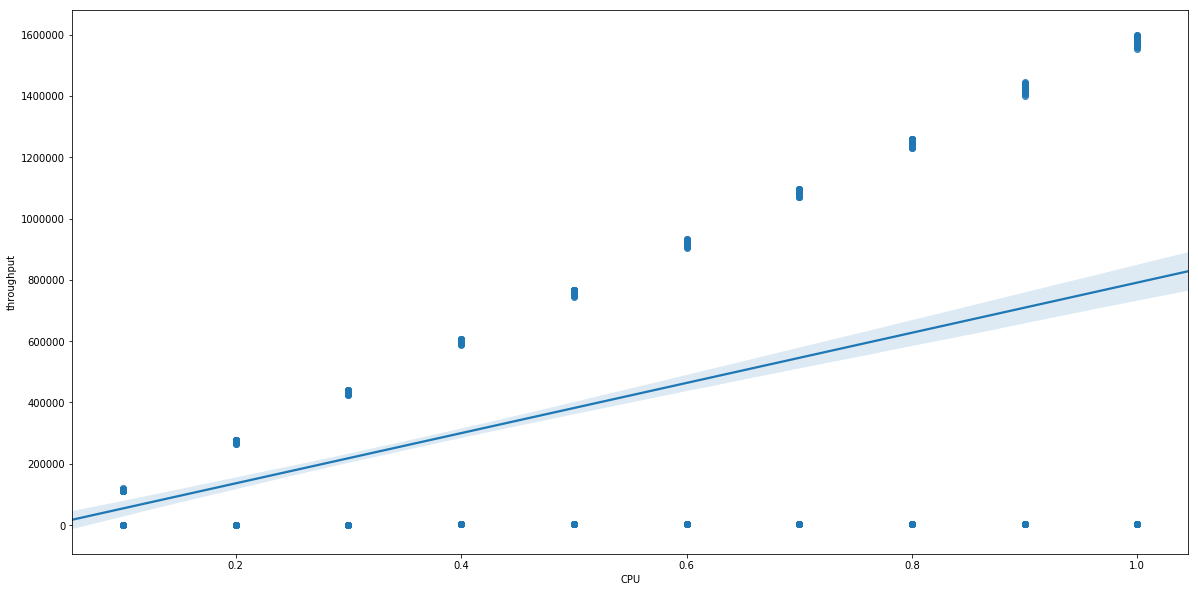

In [5]:
print("NFV Data Visualization")
data = []
for df in df_list:
    print(df.head())
    print("Info")
    print(df.info())
    print("Describe")
    print(df.describe())
    # Plotting
    f, ax = plt.subplots(1, figsize=(20,10))
    sns.regplot(x=df.CPU, y=df.throughput, data=df)
    plt.show()
    data += df.values.tolist()
df = pd.DataFrame(data, columns=['CPU','MEM','throughput'])
df.to_csv("RealData.csv", sep=',')

In [6]:
print("TEST")

TEST
